In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prc=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date. desc()).all()
prc


07-28', 0.01),
 ('2017-07-28', 0.0),
 ('2017-07-28', 0.09),
 ('2017-07-28', 0.4),
 ('2017-07-27', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-27', None),
 ('2017-07-27', 0.0),
 ('2017-07-27', 0.01),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-26', 0.06),
 ('2017-07-26', 0.02),
 ('2017-07-26', None),
 ('2017-07-26', 0.0),
 ('2017-07-26', 0.12),
 ('2017-07-26', 0.3),
 ('2017-07-25', 0.0),
 ('2017-07-25', 0.03),
 ('2017-07-25', 0.12),
 ('2017-07-25', 0.0),
 ('2017-07-25', 0.05),
 ('2017-07-25', 0.11),
 ('2017-07-25', 0.3),
 ('2017-07-24', 0.05),
 ('2017-07-24', 0.58),
 ('2017-07-24', 1.19),
 ('2017-07-24', None),
 ('2017-07-24', 0.61),
 ('2017-07-24', 0.84),
 ('2017-07-23', 0.0),
 ('2017-07-23', 0.06),
 ('2017-07-23', 0.07),
 ('2017-07-23', 0.2),
 ('2017-07-23', 0.8),
 ('2017-07-22', 0.03),
 ('2017-07-22', 0.07),
 ('2017-07-22', 0.12),
 ('2017-07-22', 0.0),
 ('2017-07-22', 0.2),
 ('2017-07-22', 4.0),
 ('2017-07-21', 0.0),
 ('2017-07-21', 0.0),
 ('2017-07-21', 0

<function matplotlib.pyplot.show(close=None, block=None)>

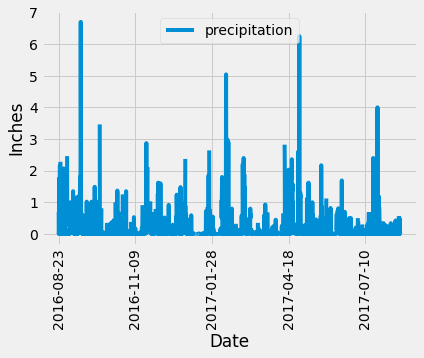

In [32]:
# Save the query results as a Pandas DataFrame and set the index to the date column
rain = pd.DataFrame(prc, columns=['date','precipitation'])
rain=rain.set_index("date")

# Sort the dataframe by date
rain=rain.sort_index()


# Use Pandas Plotting with Matplotlib to plot the data
rain.plot(ylabel="Inches", xlabel="Date")
plt.xticks(rotation=90)
plt.tight_layout
plt.show



In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
stations=session.query(Station.station).count()
stations

9

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts=session.query(Measurement.station, func.count(Measurement.prcp)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
station_counts




[('USC00519281', 2772),
 ('USC00519397', 2685),
 ('USC00513117', 2696),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [48]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
active_station



[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()